# Quora Question Pairs


# 1. Business Problem

1.1 Description

Quora is a place to gain and share knowledge—about anything. It’s a platform to ask questions and connect with people who contribute unique insights and quality answers. This empowers people to learn from each other and to better understand the world.
Over 100 million people visit Quora every month, so it's no surprise that many people ask similarly worded questions. Multiple questions with the same intent can cause seekers to spend more time finding the best answer to their question, and make writers feel they need to answer multiple versions of the same question. Quora values canonical questions because they provide a better experience to active seekers and writers, and offer more value to both of these groups in the long term.

Credits: Kaggle



# Problem Statement

Identify which questions asked on Quora are duplicates of questions that have already been asked.
This could be useful to instantly provide answers to questions that have already been answered.
We are tasked with predicting whether a pair of questions are duplicates or not.


# 1.2 Sources/Useful Links


Source : https://www.kaggle.com/c/quora-question-pairs 

Useful Links
Discussions : https://www.kaggle.com/anokas/data-analysis-xgboost-starter-0-35460-lb/comments
Kaggle Winning Solution and other approaches: https://www.dropbox.com/sh/93968nfnrzh8bp5/AACZdtsApc1QSTQc7X0H3QZ5a?dl=0
Blog 1 : https://engineering.quora.com/Semantic-Question-Matching-with-Deep-Learning
Blog 2 : https://towardsdatascience.com/identifying-duplicate-questions-on-quora-top-12-on-kaggle-4c1cf93f1c30


# 1.3 Real world/Business Objectives and Constraints


The cost of a mis-classification can be very high.
You would want a probability of a pair of questions to be duplicates so that you can choose any threshold of choice.
No strict latency concerns.
Interpretability is partially important.


# 2. Machine Learning Problem

# 2.1 Data
2.1.1 Data Overview
- Data will be in a file Train.csv 
- Train.csv contains 5 columns : qid1, qid2, question1, question2, is_duplicate 
- Size of Train.csv - 60MB 
- Number of rows in Train.csv = 404,290

# 2.1.2 Example Data point



"id","qid1","qid2","question1","question2","is_duplicate"
"0","1","2","What is the step by step guide to invest in share market in india?","What is the step by step guide to invest in share market?","0"
"1","3","4","What is the story of Kohinoor (Koh-i-Noor) Diamond?","What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?","0"
"7","15","16","How can I be a good geologist?","What should I do to be a great geologist?","1"
"11","23","24","How do I read and find my YouTube comments?","How can I see all my Youtube comments?","1"
2.2 Mapping the real world problem to an ML problem
2.2.1 Type of Machine Leaning Problem
It is a binary classification problem, for a given pair of questions we need to predict if they are duplicate or not.


# 2.2.2 Performance Metric
Source: https://www.kaggle.com/c/quora-question-pairs#evaluation

Metric(s):

log-loss : https://www.kaggle.com/wiki/LogarithmicLoss
Binary Confusion Matrix


# 2.3 Train and Test Construction
We build train and test by randomly splitting in the ratio of 70:30 or 80:20 whatever we choose as we have sufficient points to work with.


# 2.1.2 Example Data point

In [1]:
df<-read.csv("E:/Quora Question Pair/R/train.csv",na.strings='')
df<-df[sample(100000),]

In [ ]:
write.csv(df,"E:/Quora Question Pair/R/sample.csv")

In [2]:

print(paste("No of rows are:",dim(df)[1],"and","No of columns are:",
            dim(df)[2]))

[1] "No of rows are: 100000 and No of columns are: 6"


# Exploratory Data Analysis

In [1]:
library(scales)
library(qdap)
library(corpus)
library(stringr)
library(stringi)
library(fuzzywuzzyR)
library(jsonlite)
library(quanteda)
library(ggplot2)
library(tidyverse)
library(Amelia)
library(R.oo)
library(dplyr)
library(ggplot2)


Loading required package: qdapDictionaries
Loading required package: qdapRegex
Loading required package: qdapTools
Loading required package: RColorBrewer

Attaching package: 'qdap'

The following object is masked from 'package:base':

    Filter


Attaching package: 'stringr'

The following object is masked from 'package:qdap':

    %>%

Warning message:
"package 'fuzzywuzzyR' was built under R version 3.5.2"Warning message:
"package 'jsonlite' was built under R version 3.5.2"
Attaching package: 'jsonlite'

The following object is masked from 'package:qdapRegex':

    validate

Warning message:
"package 'quanteda' was built under R version 3.5.2"Package version: 1.3.14
Parallel computing: 2 of 4 threads used.
See https://quanteda.io for tutorials and examples.

Attaching package: 'quanteda'

The following objects are masked from 'package:qdap':

    %>%, as.DocumentTermMatrix, as.wfm

The following object is masked from 'jupyter:irkernel':

    View

The following object is masked from

In [4]:
head(df)
tail(df)

,id,qid1,qid2,question1,question2,is_duplicate
11721,11720,22620,22621,How do you edit a post on zomato?,How do I edit a post?,0
51211,51210,1776,87261,How would I dress like a workout guru from the year 1990 in the summer?,How do I dress like a workout guy from the year 1990 in the summer?,1
15714,15713,29995,29996,"Is Android really more secure than iOS (as Eric Schmidt claims)? If yes, how? If no, why?",Are iPhones more secure than Android phones?,1
42215,42214,76108,76109,All my answers in English CBSE board 2015 are correct. How much can I expect?,How much were you expecting and how much did you get in CBSE maths 2015 exam?,0
24303,24302,45423,45424,What are the common traits of INTJ women and girls?,What are the most common differences between the INTJs and the ISTJs?,0
86188,86187,79170,69842,"Which intersections in Kitchener, ON are particularly dangerous? Why? What could be done to improve them?",Which intersections in Atlanta are particularly dangerous? Why? What could be done to improve them?,0


,id,qid1,qid2,question1,question2,is_duplicate
837,836,1667,1668,What is difference between net and gross income?,What is the difference between gross income versus net income?,1
92585,92584,28819,3742,Can I see a private Instagram?,Can I view a private Instagram?,1
20605,20604,38859,38860,How do I calculate the radius or the 2 potential of a cylinder given the surface area?,How do I calculate the height and radius of a cylinder given the surface area?,0
47260,47259,84401,84402,Do employees at Cypress Semiconductor have a good work-life balance? Does this differ across positions and departments?,What kind of act you did that made people say you are an OCD case?,0
71208,71207,122580,122581,The loneliest number?,"What is the loneliest number, and why?",1
6490,6489,12712,12713,"If you had to commit suicide, how would you do it and why?",If you had to commit suicide how would you do it?,0


In [5]:

str(df)

'data.frame':	100000 obs. of  6 variables:
 $ id          : int  11720 51210 15713 42214 24302 86187 76101 96097 86176 29016 ...
 $ qid1        : int  22620 1776 29995 76108 45423 79170 130135 160129 87501 1028 ...
 $ qid2        : int  22621 87261 29996 76109 45424 69842 130136 160130 145369 53730 ...
 $ question1   : Factor w/ 290457 levels "\177what is the average cost you paid for a day-trading course & how long was the course & do you find that it "| __truncated__,..: 69498 92309 108231 1203 160366 249838 185368 98898 138166 69625 ...
 $ question2   : Factor w/ 299174 levels "\177how to minimize the loss function? \177",..: 57057 56920 2989 92022 172747 257887 2361 284715 34148 182470 ...
 $ is_duplicate: int  0 1 1 0 0 0 0 0 0 1 ...


# Distribution of data points among output classes
Number of duplicate(smilar) and non-duplicate(non similar) questions

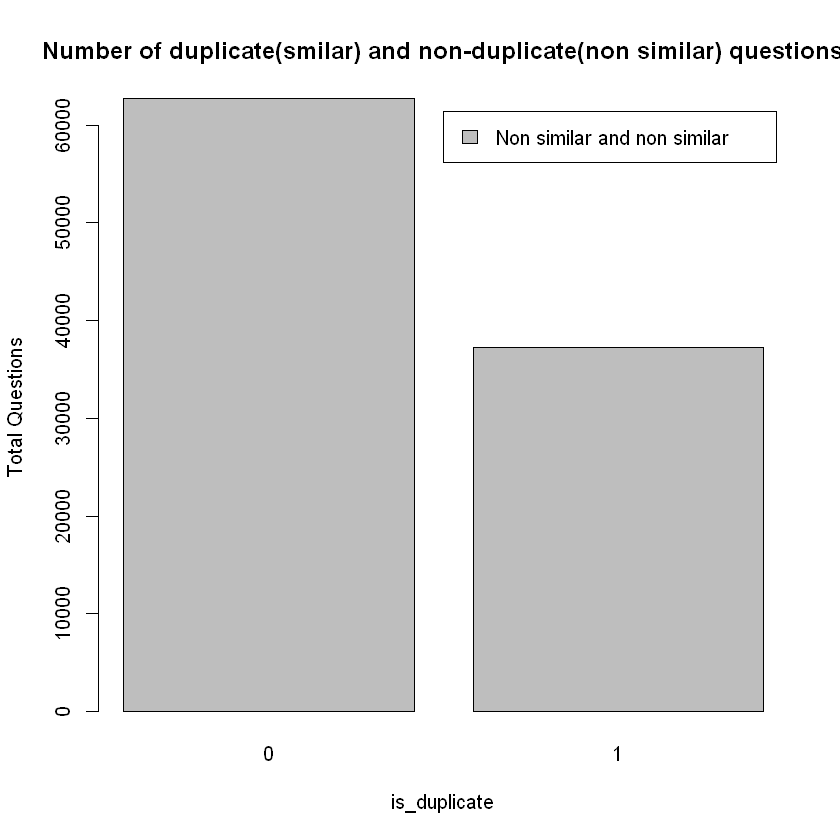

In [6]:

barplot.default(table(df$is_duplicate),ylab="Total Questions",xlab="is_duplicate",main="Number of duplicate(smilar) and non-duplicate(non similar) questions",legend.text = "Non similar and non similar")



In [7]:

df_dup<-df[(df$is_duplicate==1),]
df_ndup<-df[(df$is_duplicate==0),]

df_n_dup<-length(df_dup$is_duplicate)
df_n_ndup<-length(df_ndup$is_duplicate)

print(paste("Question pairs are  Similar",round(df_n_dup/sum(df_n_dup,df_n_ndup)*100,2),"%"))
print(paste("Question pairs are not Similar",round(df_n_ndup/sum(df_n_dup,df_n_ndup)*100,2),"%"))



[1] "Question pairs are  Similar 37.25 %"
[1] "Question pairs are not Similar 62.75 %"


# Number of unique questions

In [8]:

qids<-c(df$qid1,df$qid2)
print(paste("Total num of  Unique Questions are:",length(unique(qids))))
print(paste("Number of unique questions that appear more than one time:",
            table(table(qids)>1)[2],
            gsub(" ","",paste("(",round(table(table(qids)>1)[2]/length(unique(qids))*100,4),"%",")"))))


[1] "Total num of  Unique Questions are: 165931"
[1] "Number of unique questions that appear more than one time: 19446 (11.7193%)"


In [9]:


print(paste("Max number of times a single question is repeated:",max(table(qids))))


[1] "Max number of times a single question is repeated: 32"


In [11]:

df_q1 <- data.frame(Type=c("Unique_Questions", "Repeated_Questions"),
No=c(length(unique(qids)),table(table(qids)>1)[[2]] ))
   

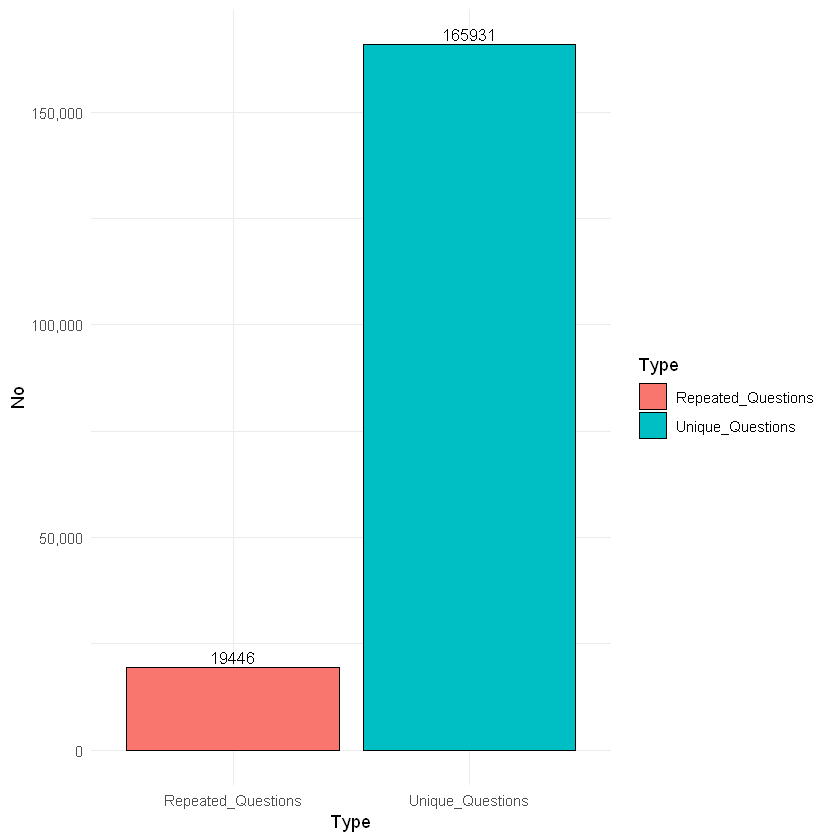

In [12]:
  
ggplot(data=df_q1, aes(x=Type,y=No,fill=Type))+
  geom_bar(stat="identity",colour="black")+
  scale_y_continuous(labels = comma)+
  geom_text(aes(label=No), vjust=-0.3,size=3.5)+
  theme_minimal()



# Checking for Duplicates

In [13]:

print(paste("Number of duplicate questions",
if(any(duplicated.data.frame(df[,-c(1,4,5)]))==FALSE){
  x=0
  } else { 
  print(length(duplicated.data.frame(df[,-c(1,4,5)])))
  }
))


[1] "Number of duplicate questions 0"


In [14]:

n_m<-unique(table(qids))
n_m<-sort(n_m,decreasing = FALSE)
min(n_m)
max(n_m)

[1] 1

[1] 32

In [15]:

tbl_qids<-table(qids)
df_rng<-data.frame()
for(i in n_m){
  v=length(tbl_qids[tbl_qids==i])
  df_rng<- rbind(df_rng,v)
  
}

In [16]:

df_rng<-cbind(n_m,df_rng)
colnames(df_rng)<- c("Number of Occurences of question","Number of questions")


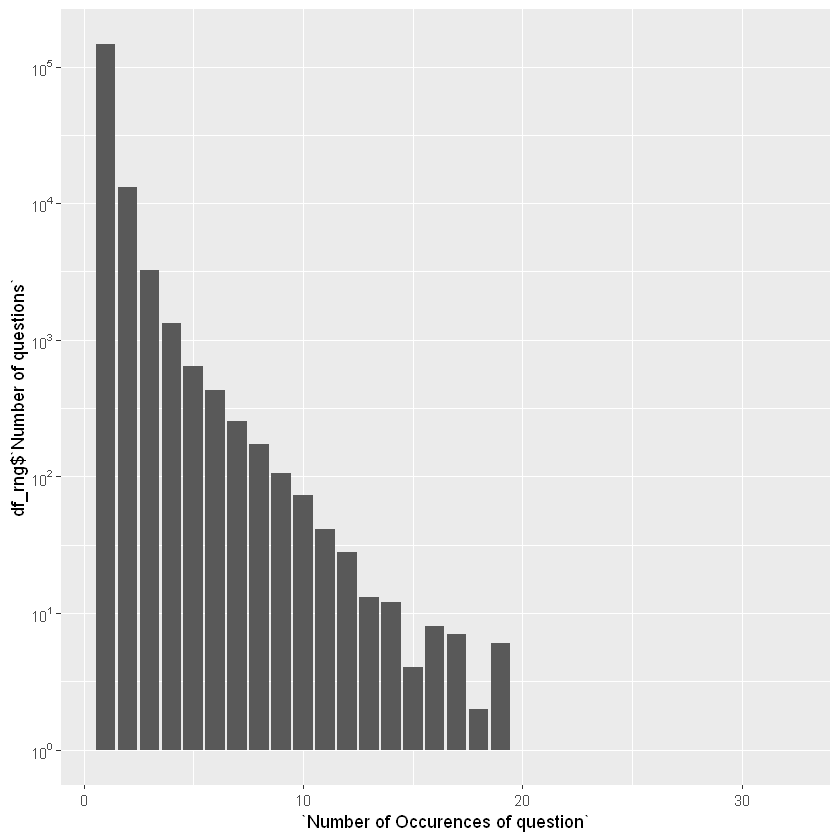

In [17]:

ggplot(data=df_rng,aes(x=`Number of Occurences of question`,y=df_rng$`Number of questions`))+geom_bar(stat="identity", position="dodge")+
  scale_y_log10(
    breaks = scales::trans_breaks("log10", function(x) 10^x),
    labels = scales::trans_format("log10", scales::math_format(10^.x))
  )


In [18]:

df[df ==" "]<- NA


In [19]:

print(paste("Total number of empty values are:",sum(is.na(df))))
print(paste("There are",sum(is.na(df)) ,
            "rows with null values in the dataframe and their position are:",
            row.names(df[!complete.cases(df),]) ))



[1] "Total number of empty values are: 0"
[1] "There are 0 rows with null values in the dataframe and their position are: "


In [20]:

dim(df)

[1] 100000      6

In [22]:

df<-df[complete.cases(df),]
dim(df)



[1] 100000      6

In [23]:

empty_rows<-which(is.na(df))


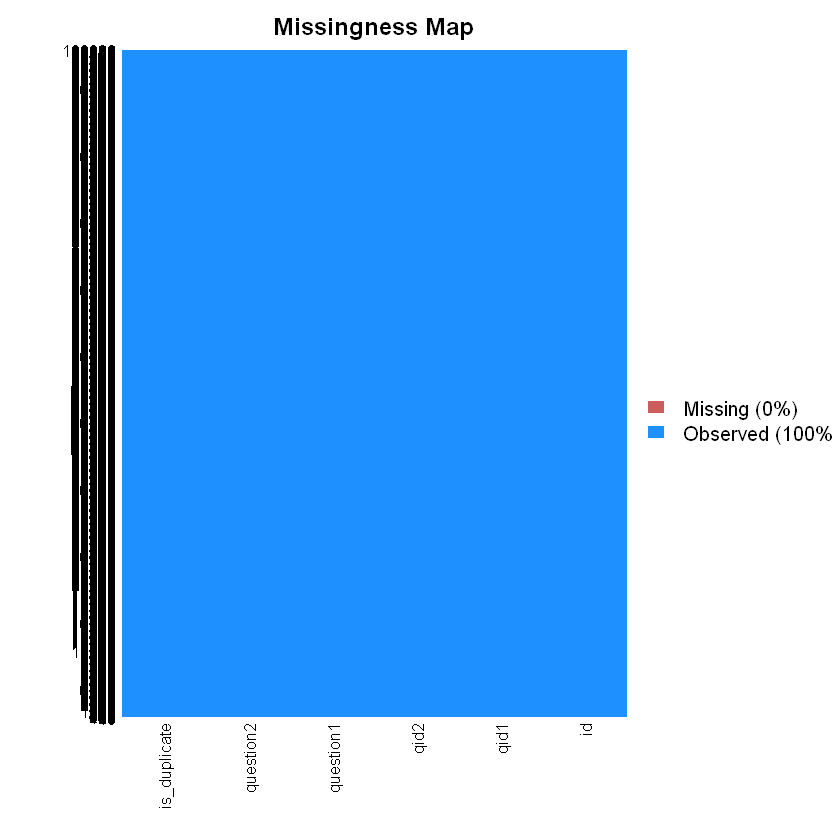

In [24]:

Amelia::missmap(df)

In [25]:

any(is.na(df))

[1] FALSE

In [26]:
qid1<-(df$qid1)
qid2<-(df$qid2)

In [30]:
df_qid1<- data.frame()
for(i in qid1){
  v=length(qid1[qid1==i])
  df_qid1<-rbind(df_qid1,v)
}


df_qid2<- data.frame()
for(i in qid2){
  v=length(qid2[qid2==i])
  df_qid2<-rbind(df_qid2,v)
}

In [31]:


# freq_qid1 = Frequency of qid1's
df$freq_qid1<- df_qid1

# freq_qid2 = Frequency of qid2's
df$freq_qid2<-df_qid2
# q1len = Length of q1
df$q1len<- str_count(df$question1)
# q2len = Length of q2
df$q2len<- str_count(df$question2)
# q1_n_words = Number of words in Question 1
df$q1_n_words<- str_count(df$question1,pattern = " ")+1
# q2_n_words = Number of words in Question 2
df$q2_n_words<- str_count(df$question2,pattern = " ")+1
# word_Common = (Number of common unique words in Question 1 and Question 2)
wrd1<-str_split(df$question1,pattern = " ")
wrd2<-str_split(df$question2,pattern = " ")

l<-list()
for(i in 1:nrow(df)){
  v<-unique(wrd1[[i]]) %in% unique(wrd2[[i]])
  if(dim(table(v))==1){
    c<-table(v)[[1]]
    l<-append(l,c,after = length(l))
  }else{
    c<-table(v)[[2]] 
    l<-append(l,c,after = length(l))
    
  }
  
}

df$word_Common<-unlist(l)
# word_Total =(Total num of words in Question 1 + Total num of words in Question 2)
df$word_Total<-lapply(1:nrow(df),function(x) sum(length(unique(wrd1[[x]])),length(unique(wrd2[[x]]))))

# word_share = (word_common)/(word_Total)
df$word_share<-df$word_Common/unlist(df$word_Total)
# freq_q1+freq_q2 = sum total of frequency of qid1 and qid2
df$freq_q1_plus_freq_q2<- df$freq_qid1+df$freq_qid2
# freq_q1-freq_q2 = absolute difference of frequency of qid1 and qid2
df$freq_q1_minus_freq_q2<- df$freq_qid1-df$freq_qid2



In [32]:

print (paste("Minimum length of the questions in question1 : " , min(df$q1_n_words)))
print (paste("Minimum length of the questions in question2 : " , min(df$q2_n_words)))
print(paste("Number of Questions with minimum length [question1] :",table(df$q1_n_words==1)[[2]]))
print(paste("Number of Questions with minimum length [question2] :", table(df$q2_n_words==1)[[2]]))


[1] "Minimum length of the questions in question1 :  1"
[1] "Minimum length of the questions in question2 :  1"
[1] "Number of Questions with minimum length [question1] : 15"
[1] "Number of Questions with minimum length [question2] : 5"


# Feature: word_share

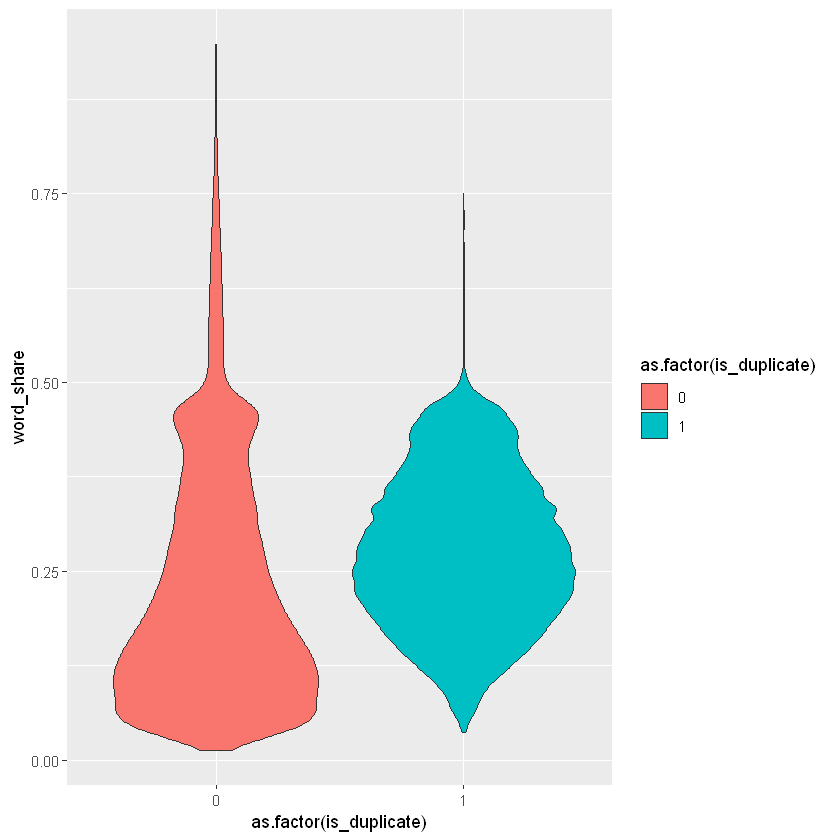

In [33]:

ggplot(data = df,aes(x=as.factor(is_duplicate),y=word_share,fill=as.factor(is_duplicate)))+geom_violin()



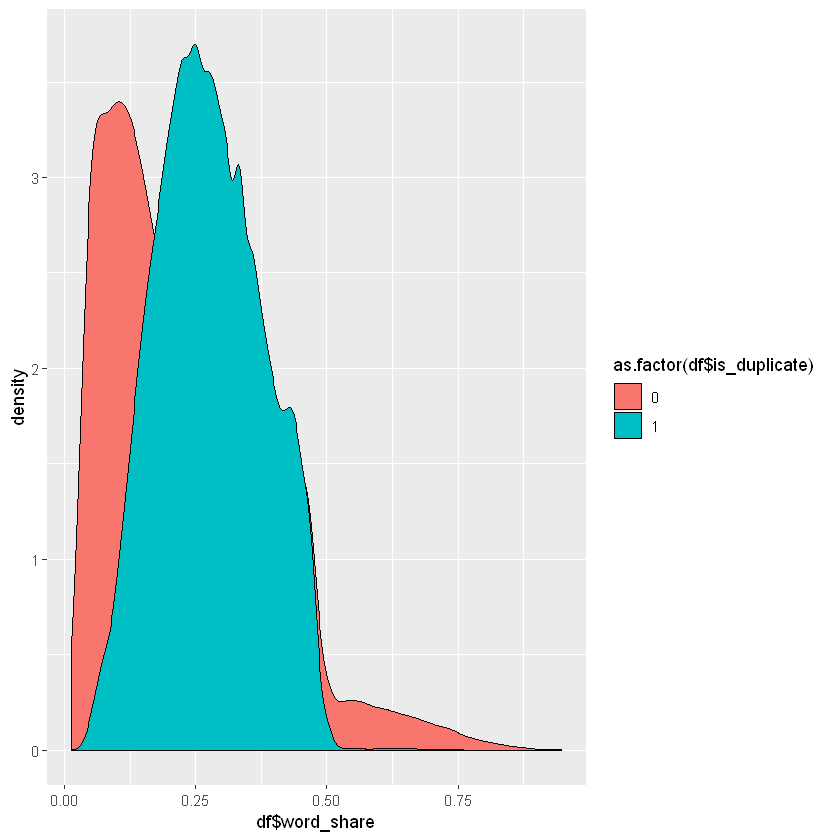

In [34]:


ggplot(df, aes(x=df$word_share,fill=as.factor(df$is_duplicate),)) +geom_density()


# Feature: word_Common

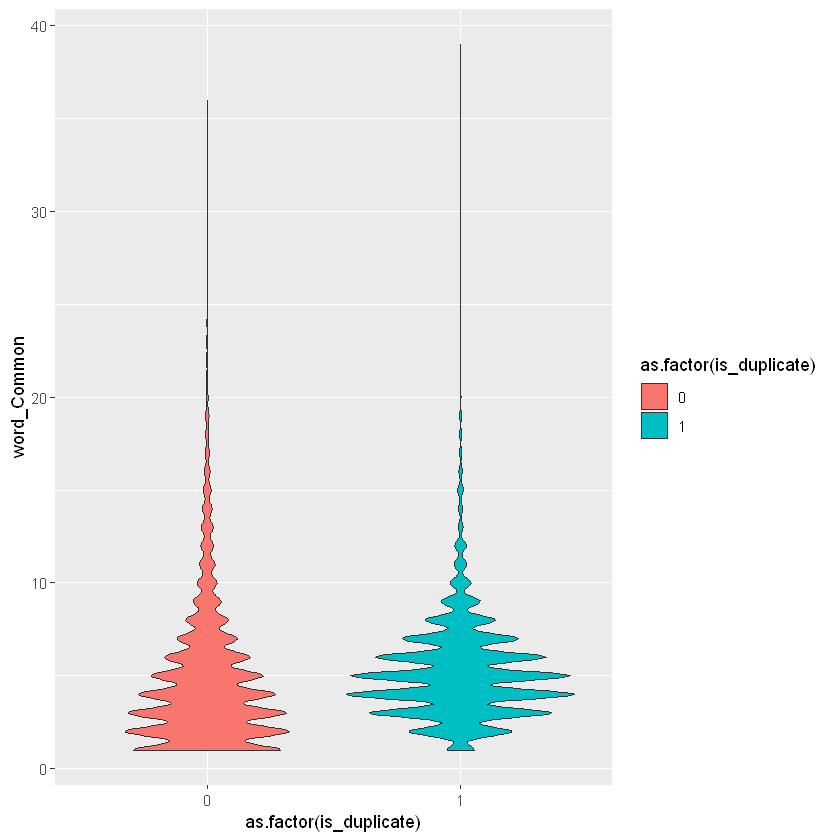

In [35]:

ggplot(data = df,aes(x=as.factor(is_duplicate),y=word_Common,fill=as.factor(is_duplicate)))+geom_violin()


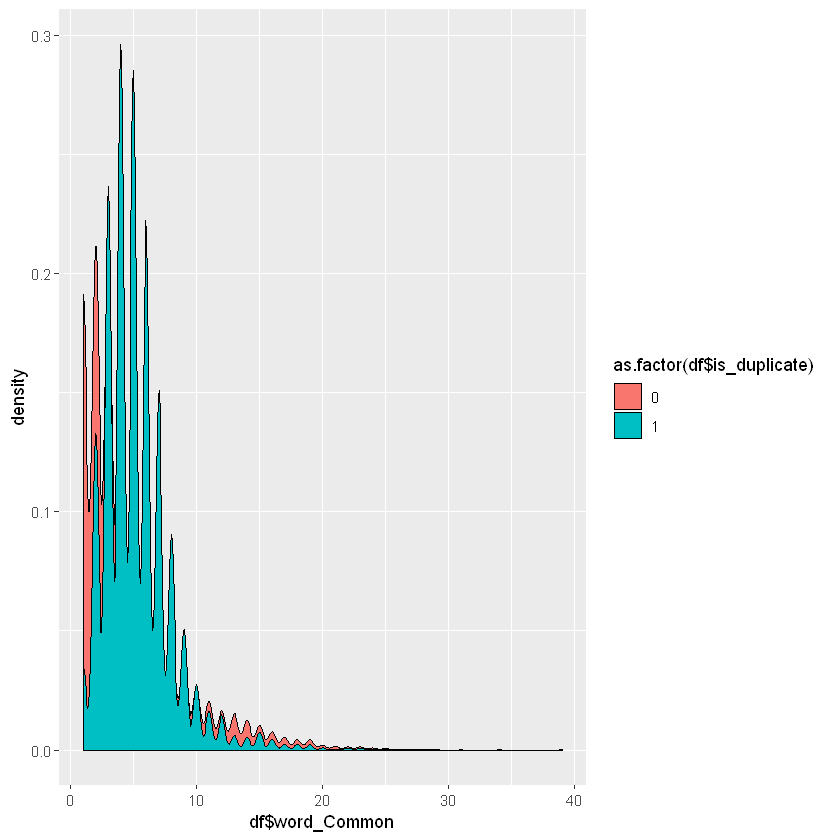

In [36]:

ggplot(df, aes(x=df$word_Common,fill=as.factor(df$is_duplicate),)) +geom_density()



# Preprocessing of Text
Preprocessing:
1. Removing html tags
2. Removing Punctuations
3. Performing stemming
4. Removing Stopwords
5. Expanding contractions etc.

In [37]:

#Function to Compute and get the features : With 2 parameters of Question 1 and Question 2

preprocess<-function(x){
  
  pattern<-c("won't","n't","v'e","he's","%","€","`",
             "cannot","cant't","it's","'re","`s","$","'ll","what's",
             "i'm","she's")
  
  replacement<-c("will not","not","have","he is","percent","euro",
                 "'","can not","can not","it is","are","own","dollar","will",
                 "what is ","i am","she is")
  x<-qdap::multigsub(pattern = pattern,replacement = replacement,x,fixed = TRUE,trailspace = TRUE,trim = TRUE)
  
  #x<-removeWords(x,c(stopwords("en")))
  x = gsub("http\\w+", "", x)
  x = gsub("[[:punct:]]", " ", x)
  x<-stem_snowball(x, algorithm = "en")
  x<-gsub("<.*?>", "", x)
  x<-tolower(x)
  
  return(x)
}

#  Advanced Feature Extraction (NLP and Fuzzy Features)


# Features:

* cwc_min : Ratio of common_word_count to min lenghth of word count of Q1 and Q2 
* cwc_min = common_word_count / (min(len(q1_words), len(q2_words)) 


* cwc_max : Ratio of common_word_count to max lenghth of word count of Q1 and Q2 
* cwc_max = common_word_count / (max(len(q1_words), len(q2_words)) 


* csc_min : Ratio of common_stop_count to min lenghth of stop count of Q1 and Q2 
* csc_min = common_stop_count / (min(len(q1_stops), len(q2_stops)) 


* csc_max : Ratio of common_stop_count to max lenghth of stop count of Q1 and Q2
* csc_max = common_stop_count / (max(len(q1_stops), len(q2_stops)) 


* ctc_min : Ratio of common_token_count to min lenghth of token count of Q1 and Q2
* ctc_min = common_token_count / (min(len(q1_tokens), len(q2_tokens)) 


* ctc_max : Ratio of common_token_count to max lenghth of token count of Q1 and Q2
* ctc_max = common_token_count / (max(len(q1_tokens), len(q2_tokens)) 


* last_word_eq : Check if First word of both questions is equal or not
* last_word_eq = int(q1_tokens[-1] == q2_tokens[-1]) 


* first_word_eq : Check if First word of both questions is equal or not
* first_word_eq = int(q1_tokens[0] == q2_tokens[0]) 


* abs_len_diff : Abs. length difference
* abs_len_diff = abs(len(q1_tokens) - len(q2_tokens)) 


* mean_len : Average Token Length of both Questions
* mean_len = (len(q1_tokens) + len(q2_tokens))/2 


* fuzz_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/ 


* fuzz_partial_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/ 


* token_sort_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/ 

* token_set_ratio : https://github.com/seatgeek/fuzzywuzzy#usage http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/ 



In [38]:


get_token_features<-function(q1,q2){
# q1=df$question1
# q2<-df$question2
  token_features=list()

  q1<-str_trim(q1)
  q2<-str_trim(q2)
  
  ##converting the sentence into tokens
  q1_tokens<-unlist(strsplit(q1," "))
  q2_tokens<-unlist(strsplit(q2," "))
  
  #q1_tokens<-quanteda::tokens(as.character(df$question1),what=("word"))
  #q2_tokens<-quanteda::tokens(as.character(df$question2),what=("word"))
  
  if(length(q1_tokens)==0| length(q2_tokens)==0) {
    p<-rep(0,10)
    return(p)
  }
  
  
  
  ## Get the non-stopwords in questions
  
  q1_words<-unlist(lapply(1:length(q1_tokens),function(x) (q1_tokens[x])[!(q1_tokens[x]) %in% stopwords()]))
  q2_words<-unlist(lapply(1:length(q2_tokens),function(x) (q2_tokens[x])[!(q2_tokens[x]) %in% stopwords()]))
  
  ## Get the stopwords in question
  q1_stops<-unlist(lapply(1:length(q1_tokens),function(x) (q1_tokens[x])[(q1_tokens[x]) %in% stopwords()]))
  q2_stops<-unlist(lapply(1:length(q2_tokens),function(x) (q2_tokens[x])[(q2_tokens[x]) %in% stopwords()]))
  
  
  
  ##get the common non-topwords from question pair
  commom_word_count<-length(intersect(q1_words, q2_words))
  
  ## get the common stopwords from Question pair
  common_stop_count<- length(intersect(q1_stops,q2_stops))
  SAFE_DIV = 0.0001
  
  #get the common tokens from question pair
  common_token_count<- length(intersect(q1_tokens,q2_tokens))
  
  token_features<-append(token_features,commom_word_count/(min(length(q1_words),length(q2_words))+SAFE_DIV),
                         (length(token_features)+1))
  token_features<-append(token_features,commom_word_count/(max(length(q1_words),length(q2_words))+SAFE_DIV),
                         (length(token_features)+1))
  
  token_features<-append(token_features,common_stop_count/(min(length(q1_stops),length(q2_stops))+SAFE_DIV),
                         (length(token_features)+1))
  token_features<-append(token_features,common_stop_count/(max(length(q1_stops),length(q2_stops))+SAFE_DIV),
                         (length(token_features)+1))
  
  token_features<-append(token_features,common_token_count/(min(length(q1_tokens),length(q2_tokens))+SAFE_DIV),
                         (length(token_features)+1))
  token_features<-append(token_features,common_token_count/(max(length(q1_tokens),length(q2_tokens))+SAFE_DIV),
                         (length(token_features)+1))
  
  
  
  # Last word of both question is same or not

  
  if(q1_tokens[length(q1_tokens)]==q2_tokens[length(q2_tokens)]){
    p=1
  } else{
    p=0
  }
  
  token_features<-append(token_features,p,length(token_features)+1)
  
  # First word of both question is same or not
  
  
  if(q1_tokens[[1]]==q2_tokens[[1]]){
    p1=1
  } else{
    p1=0
  }
  
  token_features<-append(token_features,p1,length(token_features)+1)
  
  
  
  token_features<-append(token_features,abs(length(q1_tokens) - length(q2_tokens)),length(token_features)+1)
  
  #Average Token Length of both Questions
  token_features =append(token_features,((length(q1_tokens) + length(q2_tokens))/2),length(token_features)+1)
  
  return (token_features)
  
  
}




In [39]:

extract_features<-function(df){
  
  df$question1<-lapply(df$question1,function(x) preprocess(x))
  df$question2<-lapply(df$question2,function(x) preprocess(x))
  
  dfa<-data.frame(df)
  
  dfa<-cbind(dfa$question1,dfa$question2)
  dfa<-data.frame(dfa)
  #library(stringr)
  token_features = (lapply(1:nrow(dfa),function(x) unlist(get_token_features(unlist(dfa[x,"X1"]),unlist(dfa[x,"X2"])))))
  
  token_features<-do.call(rbind, token_features)
  

 
  
  df$cwc_min       = token_features[,1]
  df$cwc_max       = token_features[,2]
  df$csc_min       = token_features[,3]
  df$csc_max       = token_features[,4]
  df$ctc_min       = token_features[,5]
  df$ctc_max       = token_features[,6]
  df$last_word_eq  = token_features[,7]
  df$first_word_eq = token_features[,8]
  df$abs_len_diff  = token_features[,9]
  df$mean_len      = token_features[,10]
  
  



  
  #Computing Fuzzy Features and Merging with Dataset
  #token_features = lapply(1:nrow(dfa),function(x) unlist(get_token_features(unlist(dfa[x,"X1"]),unlist(dfa[x,"X2"]))))
  init = fuzzywuzzyR::FuzzMatcher$new() 
  
  
  df$token_set_ratio= unlist(lapply(1:nrow(dfa), function(x) unlist(init$Token_set_ratio(string1 =unlist(dfa[,"X1"][x]), 
  string2 =unlist(dfa[,"X2"][x]) , force_ascii = TRUE, full_process = TRUE))))
  
  df$token_sort_ratio=unlist(lapply(1:nrow(dfa), function(x) unlist(init$Token_sort_ratio(string1 =unlist(dfa[,"X1"][x]),
  string2 =unlist(dfa[,"X2"][x]) , force_ascii = TRUE, full_process = TRUE))))
  
  df$fuzz_ratio=unlist(lapply(1:nrow(dfa),function(x) unlist(init$QRATIO(string1 =unlist(dfa[,"X1"][x]),
  string2 =unlist(dfa[,"X2"][x]) , force_ascii = TRUE))))
  
  df$fuzz_partial_ratio=unlist(lapply(1:nrow(dfa),function(x) unlist(init$Partial_ratio(string1 =unlist(dfa[,"X1"][x]),
  string2 =unlist(dfa[,"X2"][x])))))
  
  #df["longest_substr_ratio"]=lapply(1:nrow(dfa),function(x) unlist(get_longest_substr_string(unlist(dfa[,"X1"][x]), unlist(dfa[,"X2"][x]))))
  
  
  
  df$question1<-dfa$X1
  df$question2<-dfa$X2
  return (df)
  
}


In [ ]:


final_df<-extract_features(df)


In [42]:

#Plotting Word clouds
#Creating Word Cloud of Duplicates and Non-Duplicates Question pairs
#We can observe the most frequent occuring words

df_duplicate<-subset(final_df,final_df$is_duplicate==1)
df_nonduplicate<-subset(final_df,final_df$is_duplicate==0)

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p<-unlist(rbind(df_duplicate$question1,df_duplicate$question2))
n<-unlist(rbind(df_nonduplicate$question1,df_nonduplicate$question2))



print (paste("Number of data points in class 1 (duplicate pairs) :",length(p)))
print (paste("Number of data points in class 0 (non duplicate pairs) :",length(n)))


[1] "Number of data points in class 1 (duplicate pairs) : 74508"
[1] "Number of data points in class 0 (non duplicate pairs) : 125492"


In [ ]:

#Saving the np array into a text file

write.table(p, file = "train_p.txt", sep = "\t",
            row.names = TRUE, col.names = NA)
write.table(n, file = "train_n.txt", sep = "\t",
            row.names = TRUE, col.names = NA)


In [43]:

textp_w<-read.table("train_p.txt")
textn_w<-read.table("train_n.txt")
textp_w<-textp_w[,2]
textn_w<-textn_w[,2]

stopwords<-c(stopwords(),"said","br"," ","not","no","like","can","best")

print (paste("Total number of words in duplicate pair questions :",length(textp_w)))
print (paste("Total number of words in non duplicate pair questions :",length(textn_w)))


[1] "Total number of words in duplicate pair questions : 74509"
[1] "Total number of words in non duplicate pair questions : 125493"


In [44]:

library(wordcloud2)
textp_w<-as.character(textp_w)
textn_w<-as.character(textn_w)

myDfm <- tokens(textp_w) %>%
  tokens_remove("\\p{P}", valuetype = "regex", padding = TRUE) %>%
  tokens_remove(stopwords("english"), padding  = TRUE) %>%
  tokens_ngrams(n = 2) %>%
  dfm()


myDfmn <- tokens(textn_w) %>%
  tokens_remove("\\p{P}", valuetype = "regex", padding = TRUE) %>%
  tokens_remove(stopwords("english"), padding  = TRUE) %>%
  tokens_ngrams(n = 2) %>%
  dfm()


myDfm<-featnames(myDfm)
myDfmn<-featnames(myDfmn)

print(myDfm[1:20])
print(myDfmn[1:20])


 [1] "question_correctly"  "quora_marks"         "quora_needing"      
 [4] "banning_rs"          "needing_improvement" "rs_500"             
 [7] "rs_1000"             "1000_notes"          "indian_economy"     
[10] "make_dollar"         "feel_like"           "favorite_chinese"   
[13] "chinese_foods"       "dollar_300"          "week_online"        
[16] "chinese_food"        "banning_500"         "300_fast"           
[19] "fast_online"         "1000_rupee"         
 [1] "snitches_treated"     "psychopaths_treated"  "serving_meat"        
 [4] "vegetarian_feta"      "feta_cheese"          "cheese_served"       
 [7] "one_react"            "ex_boyfriend"         "good_life"           
[10] "good_books"           "life_sciences"        "sciences_journals"   
[13] "web_application"      "publish_research"     "application_security"
[16] "research_papers"      "papers_free"          "makar_sankranti"     
[19] "good_journals"        "sankranti_kite"      


In [45]:

wrd_p<-as.data.frame(table(unlist(str_split(textp_w," "))))
wrd_n<-as.data.frame(table(unlist(str_split(textn_w," "))))

 wrd_p<-wrd_p[!wrd_p$Var1 %in% stopwords,]
 wrd_n<-wrd_n[!wrd_n$Var1 %in% stopwords,]


wrd_p<- wrd_p[order(wrd_p$Freq,decreasing = TRUE),]
wrd_n<- wrd_n[order(wrd_n$Freq,decreasing = TRUE),]


# Visualization


In [5]:

#wordcloud2(wrd_p[1:100,],size = 14,backgroundColor = "black",color='random-dark')


#wordcloud2(wrd_n[1:100,],size = 14,backgroundColor = "black",color='random-dark')

 


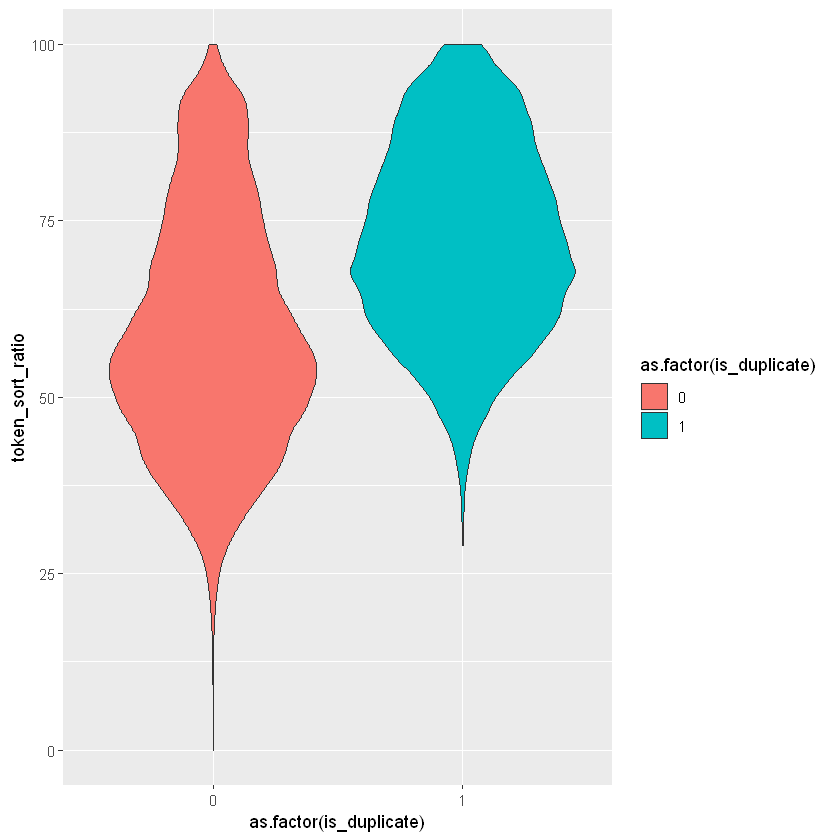

In [49]:


ggplot(data = final_df,aes(x=as.factor(is_duplicate),y=token_sort_ratio,fill=as.factor(is_duplicate)))+geom_violin()





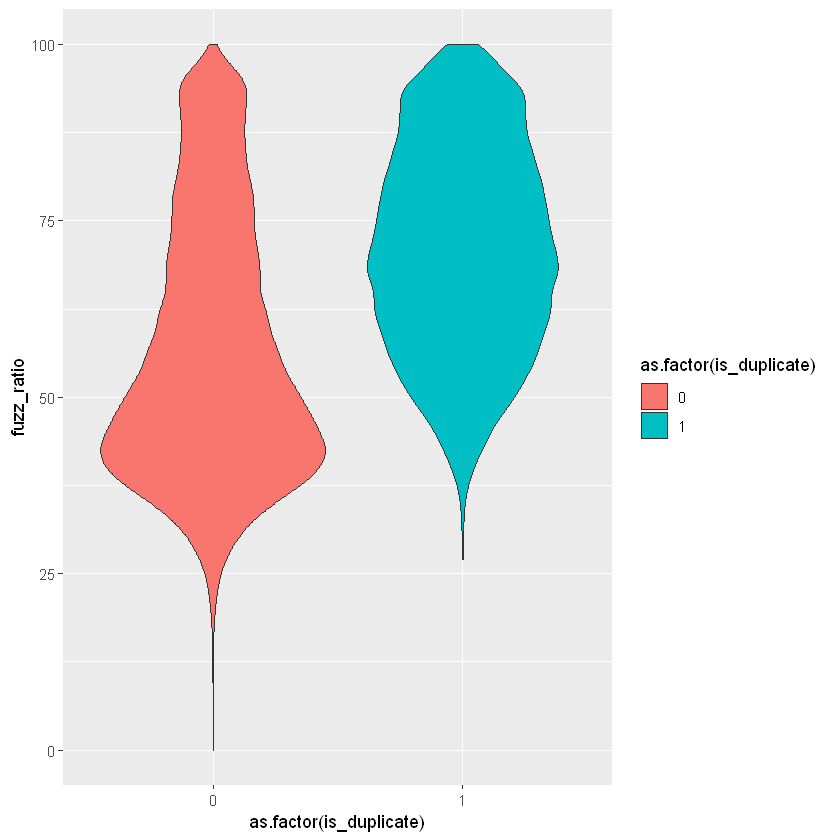

In [48]:
ggplot(data = final_df,aes(x=as.factor(is_duplicate),y=fuzz_ratio,fill=as.factor(is_duplicate)))+geom_violin()

In [50]:

df_tsne<-final_df %>% select('cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio')
df_tsne = cbind(final_df['is_duplicate'],df_tsne)
normalize <- function(x)
{
  return((x- min(x)) /(max(x)-min(x)))
}
df_tsne<-data.frame(lapply(df_tsne,function(x) normalize(x)))


In [65]:

#install.packages("Rtsne")
## Curating the database for analysis with both t-SNE and PCA
Labels<-df_tsne$is_duplicate
df_tsne$is_duplicate<-as.factor(df_tsne$is_duplicate)
## for plotting
colors = rainbow(length(unique(df_tsne$is_duplicate)))
names(colors) = unique(df_tsne$is_duplicate)
df_tsne<-df_tsne %>% distinct()
dim(df_tsne)


[1] 98517    15

Performing PCA
Read the 999 x 14 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 2.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.03 seconds (sparsity = 0.008222)!
Learning embedding...
Iteration 50: error is 99.642271 (50 iterations in 0.28 seconds)
Iteration 100: error is 81.900206 (50 iterations in 0.16 seconds)
Iteration 150: error is 76.555356 (50 iterations in 0.15 seconds)
Iteration 200: error is 73.642106 (50 iterations in 0.15 seconds)
Iteration 250: error is 71.760485 (50 iterations in 0.14 seconds)
Iteration 300: error is 1.969582 (50 iterations in 0.14 seconds)
Iteration 350: error is 1.383779 (50 iterations in 0.21 seconds)
Iteration 400: error is 1.164855 (50 iterations in 0.15 seconds)
Iteration 450: error is 1.049573 (50 iterations in 0.14 seconds)
Iteration 500: error is 0.979651 (50 iterations in 0.15 seconds)
Fitting performed in 1.66 seconds.
Performing PCA
Read the 999 x 14 data matrix

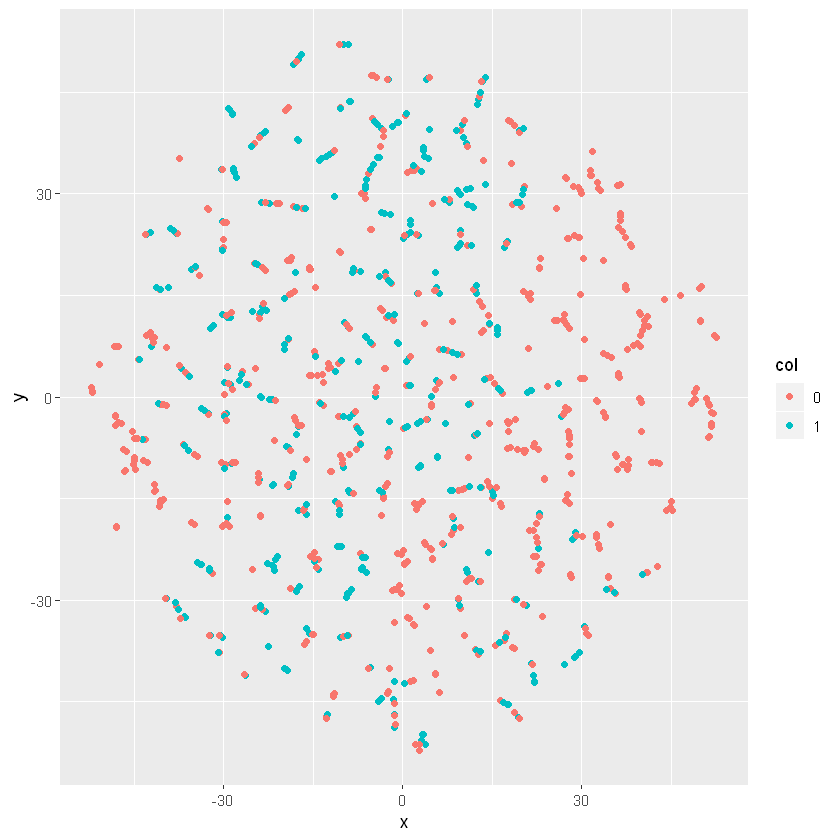

Performing PCA
Read the 999 x 14 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 30.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.22 seconds (sparsity = 0.112298)!
Learning embedding...
Iteration 50: error is 61.895548 (50 iterations in 0.30 seconds)
Iteration 100: error is 56.175018 (50 iterations in 0.20 seconds)
Iteration 150: error is 55.211855 (50 iterations in 0.19 seconds)
Iteration 200: error is 54.775797 (50 iterations in 0.19 seconds)
Iteration 250: error is 54.516729 (50 iterations in 0.20 seconds)
Iteration 300: error is 0.850946 (50 iterations in 0.16 seconds)
Iteration 350: error is 0.677768 (50 iterations in 0.16 seconds)
Iteration 400: error is 0.634853 (50 iterations in 0.16 seconds)
Iteration 450: error is 0.618704 (50 iterations in 0.16 seconds)
Iteration 500: error is 0.606682 (50 iterations in 0.17 seconds)
Fitting performed in 1.88 seconds.


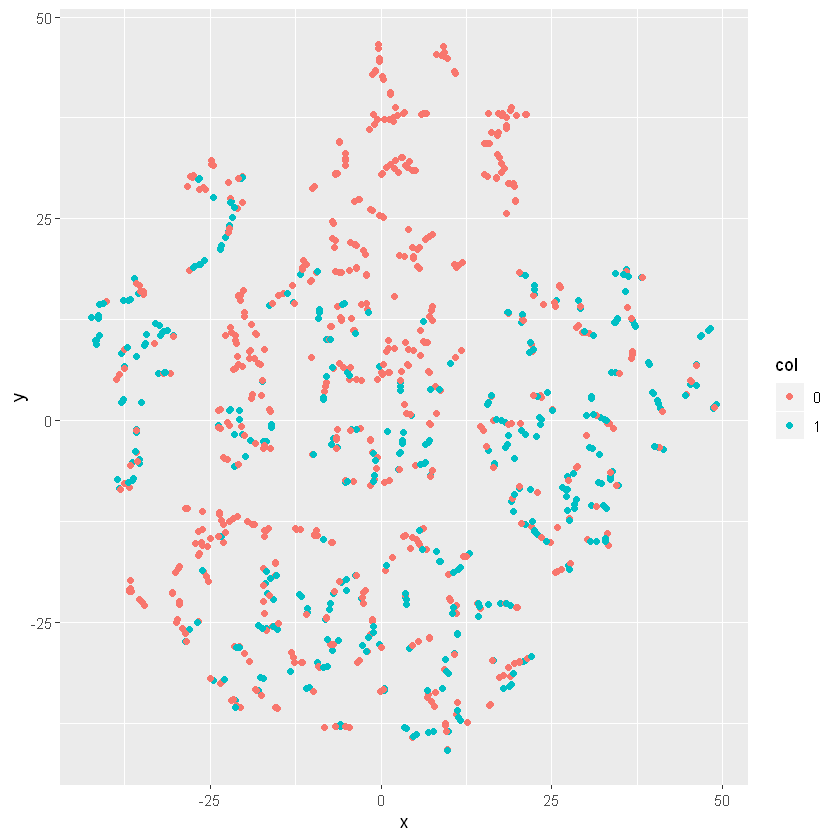

Performing PCA
Read the 999 x 14 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 50.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.34 seconds (sparsity = 0.186707)!
Learning embedding...
Iteration 50: error is 56.303535 (50 iterations in 0.20 seconds)
Iteration 100: error is 51.229890 (50 iterations in 0.20 seconds)
Iteration 150: error is 50.469048 (50 iterations in 0.17 seconds)
Iteration 200: error is 50.155546 (50 iterations in 0.19 seconds)
Iteration 250: error is 49.968857 (50 iterations in 0.19 seconds)
Iteration 300: error is 0.644654 (50 iterations in 0.18 seconds)
Iteration 350: error is 0.518089 (50 iterations in 0.17 seconds)
Iteration 400: error is 0.480773 (50 iterations in 0.19 seconds)
Iteration 450: error is 0.463201 (50 iterations in 0.19 seconds)
Iteration 500: error is 0.454441 (50 iterations in 0.17 seconds)
Fitting performed in 1.85 seconds.


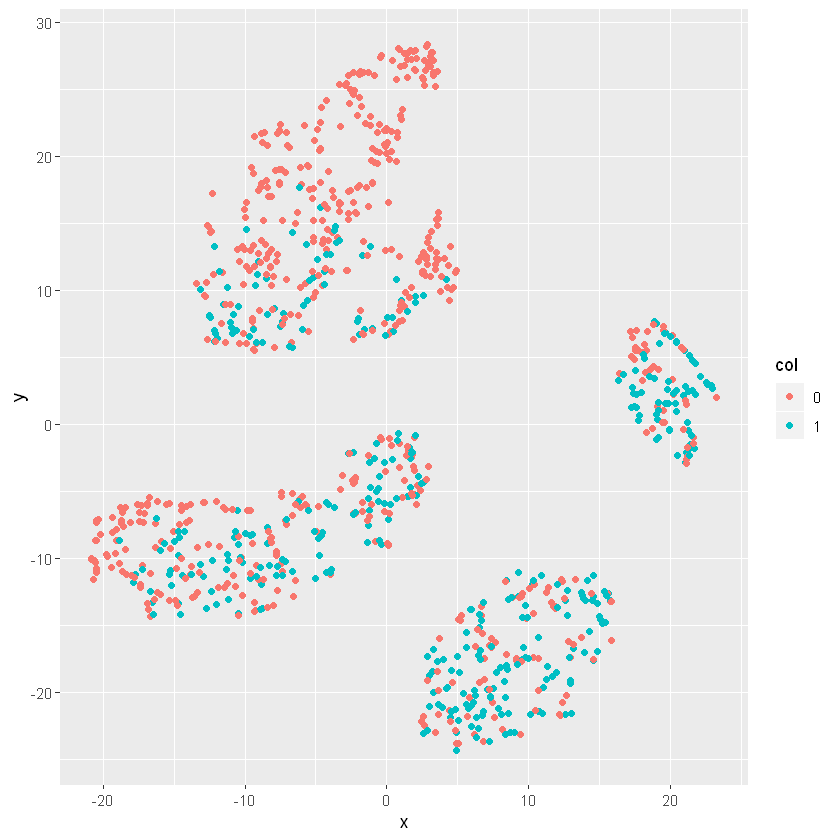

Performing PCA
Read the 999 x 14 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 100.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 0.73 seconds (sparsity = 0.351593)!
Learning embedding...
Iteration 50: error is 50.021376 (50 iterations in 0.26 seconds)
Iteration 100: error is 45.827956 (50 iterations in 0.25 seconds)
Iteration 150: error is 45.547321 (50 iterations in 0.35 seconds)
Iteration 200: error is 45.429631 (50 iterations in 0.30 seconds)
Iteration 250: error is 45.378316 (50 iterations in 0.27 seconds)
Iteration 300: error is 0.344767 (50 iterations in 0.26 seconds)
Iteration 350: error is 0.277537 (50 iterations in 0.25 seconds)
Iteration 400: error is 0.263005 (50 iterations in 0.22 seconds)
Iteration 450: error is 0.256388 (50 iterations in 0.20 seconds)
Iteration 500: error is 0.254201 (50 iterations in 0.22 seconds)
Fitting performed in 2.57 seconds.


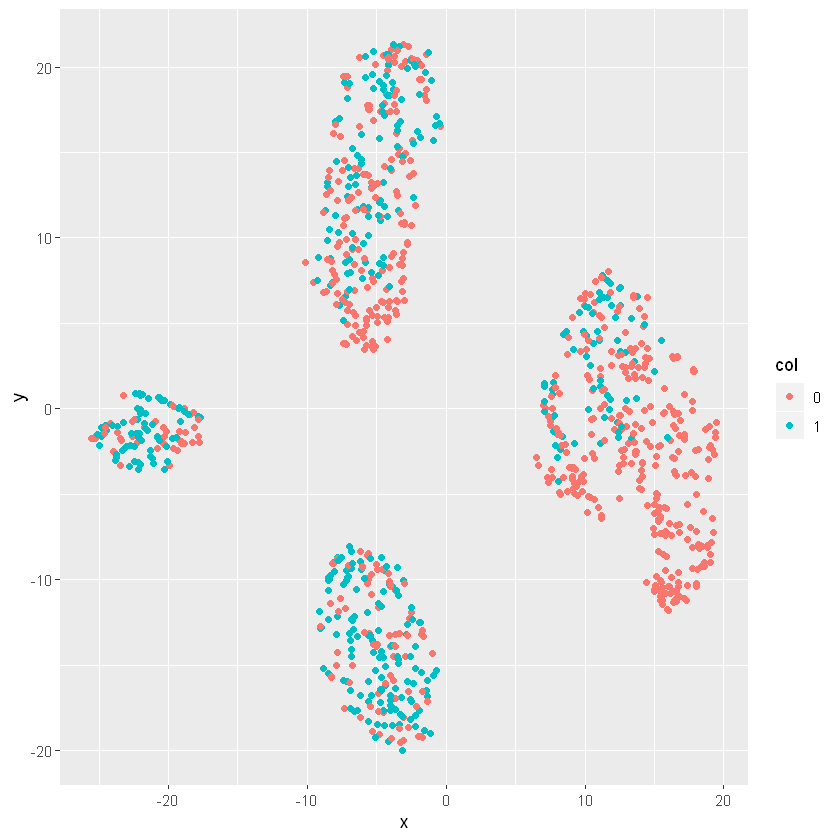

Performing PCA
Read the 999 x 14 data matrix successfully!
OpenMP is working. 1 threads.
Using no_dims = 2, perplexity = 150.000000, and theta = 0.500000
Computing input similarities...
Building tree...
Done in 1.14 seconds (sparsity = 0.509052)!
Learning embedding...
Iteration 50: error is 51.734763 (50 iterations in 0.31 seconds)
Iteration 100: error is 44.778453 (50 iterations in 0.28 seconds)
Iteration 150: error is 44.629380 (50 iterations in 0.28 seconds)
Iteration 200: error is 44.680547 (50 iterations in 0.28 seconds)
Iteration 250: error is 44.732740 (50 iterations in 0.28 seconds)
Iteration 300: error is 0.229776 (50 iterations in 0.25 seconds)
Iteration 350: error is 0.190125 (50 iterations in 0.25 seconds)
Iteration 400: error is 0.181835 (50 iterations in 0.25 seconds)
Iteration 450: error is 0.179297 (50 iterations in 0.25 seconds)
Iteration 500: error is 0.177103 (50 iterations in 0.27 seconds)
Fitting performed in 2.71 seconds.


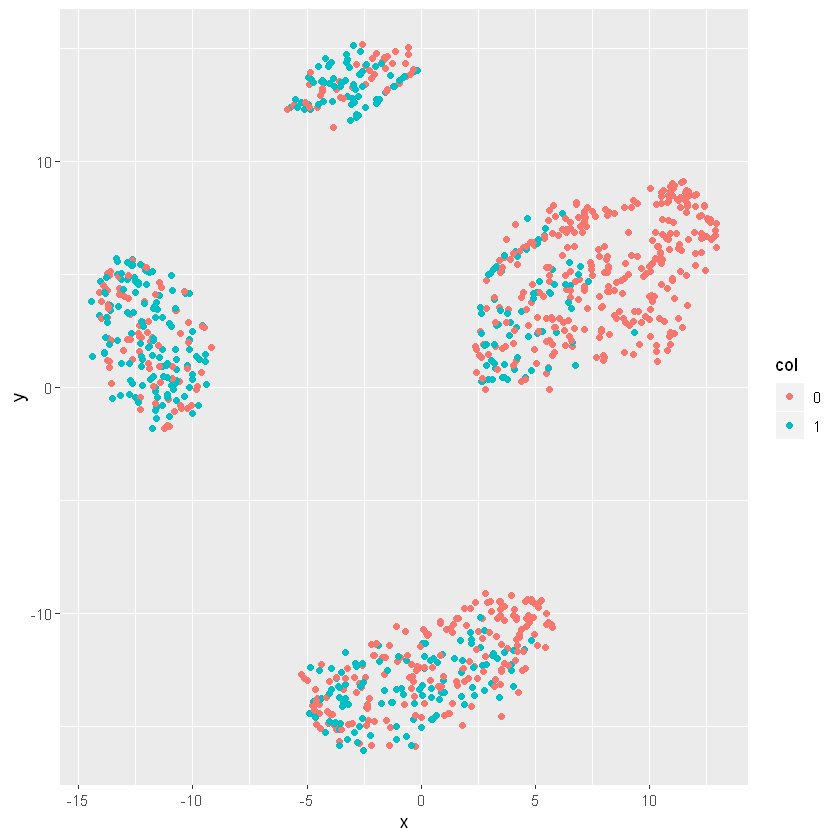

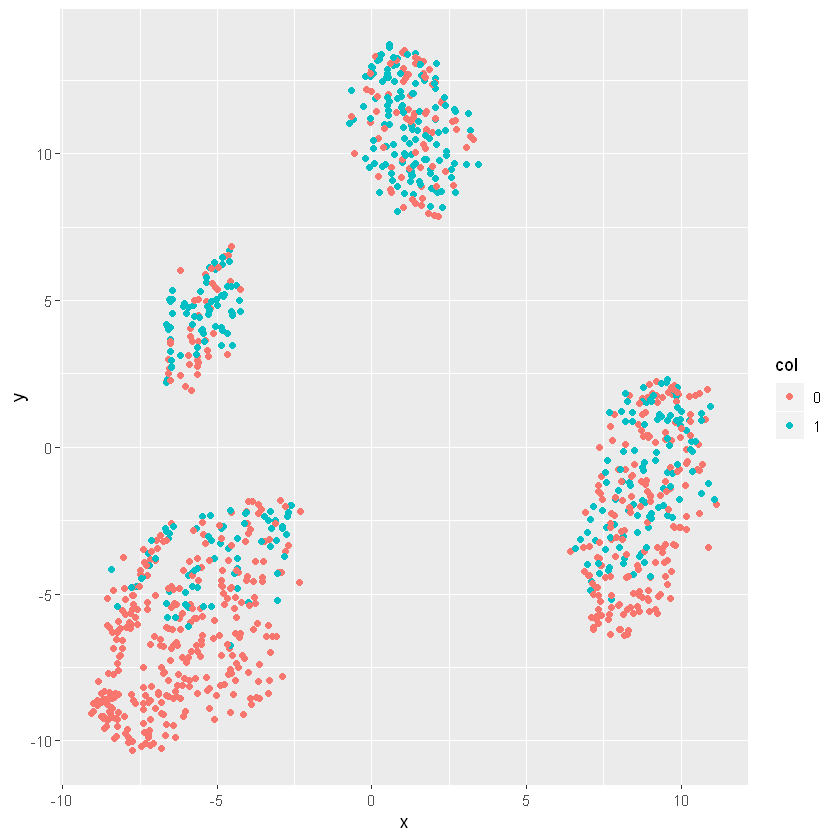

In [66]:



for(i in perplexity_values){
  tsne <- Rtsne(train[,-1], dims = 2, perplexity=i, verbose=TRUE, max_iter=500, eta=200)
  tsne_plot <- data.frame(x = tsne$Y[,1], y = tsne$Y[,2], col = train$is_duplicate)
  p<-ggplot(tsne_plot) + geom_point(aes(x=x, y=y, color=col))
  plot(p)
  
  
}
perplexity_values <- c(2,5,30,50,100,150)



In [ ]:

final_df<-data.frame(final_df)
final_df<-apply(final_df,2,as.character)
write.csv(final_df,"E:/Quora Question Pair/R/df_final.csv")
